<a href="https://colab.research.google.com/github/giuli-c/ProfessionAI_MachineLearning_projects/blob/main/Cross_Sellling_Assicurativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Cross-Selling Assicurativo
AssurePredict è una compagnia di assicurazioni leader nel settore, specializzata nell'offrire soluzioni innovative per la gestione del rischio. Questo progetto mira a creare un modello predittivo in grado di individuare potenziali opportunità di cross-selling per clienti esistenti, identificando quelli che potrebbero essere interessati ad acquistare una polizza aggiuntiva per il loro veicolo.

## Obiettivo del Progetto
L'obiettivo è sviluppare un modello di machine learning che preveda se i clienti, che attualmente hanno un'assicurazione sanitaria, potrebbero essere interessati a sottoscrivere una polizza assicurativa per il loro veicolo. Il modello aiuterà AssurePredict a migliorare l'efficacia delle proprie strategie di cross-selling e ad aumentare la penetrazione nel mercato.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
from google.colab import files

In [2]:
upload_file = files.upload()


Saving insurance_cross_sell.csv to insurance_cross_sell.csv


In [3]:
file_name = next(iter(upload_file))

In [4]:
df = pd.read_csv(file_name)
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## ESPLORAZIONE DEL DATASET
1. Verifico il numero di righe e colonne del dataset.
2. Verifico la tipologia di ogni variabile.
3. ENCODING DEI DATI.
Vediamo che ci sono delle varibili categoriche alla quale è necessario fare l'encoding.
- LabelEncoding per variabili varibili categoriche normali (Gender - Vehicle_Damage).
- Mapping per variabili varibili categoriche ordinali (Vehicle_Age).
Il mapping permette di effettuare un controllo migliore sulla correlazione delle veriabili.
4. Visualizzo la distribuzione delle varibiali target.
5. Descrizione statistica delle valriabili numeriche:
- Response: identifica se c'è uno sbilanciamento tra i dati
- Annual Premium: esplora la distribuzione dei premi annuali e come influenzano la decisione del cliente.
- Vehicle Age e Previously Insured: analizza le caratteristiche dei veicoli e se i clienti erano precedentemente assicurati.

In [5]:
df.shape

(381109, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [7]:
# Controllo ulteriore per i valori nulli
df.isnull().sum()

,0
id,0
Gender,0
Age,0
Driving_License,0
Region_Code,0
Previously_Insured,0
Vehicle_Age,0
Vehicle_Damage,0
Annual_Premium,0
Policy_Sales_Channel,0


Notiamo che non esistono valori null nella colonna di riferimento.


In [8]:
#ENCODING DEI DATI
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[["Gender", "Vehicle_Damage"]] = df[["Gender", "Vehicle_Damage"]].apply(lambda x: le.fit_transform(x))
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [9]:
# Controllo tutti i valori presenti nella colonna Vehicle_Age.
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [10]:
#MAPPING
veic_age_mapping = {'< 1 Year': 0, '1-2 Year': 1, '> 2 Years': 2}
df['Vehicle_Age'] = df["Vehicle_Age"].map(veic_age_mapping)
df

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,0,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26.0,1,1,0,30170.0,26.0,88,0
381105,381106,1,30,1,37.0,1,0,0,40016.0,152.0,131,0
381106,381107,1,21,1,30.0,1,0,0,35118.0,160.0,161,0
381107,381108,0,68,1,14.0,0,2,1,44617.0,124.0,74,0


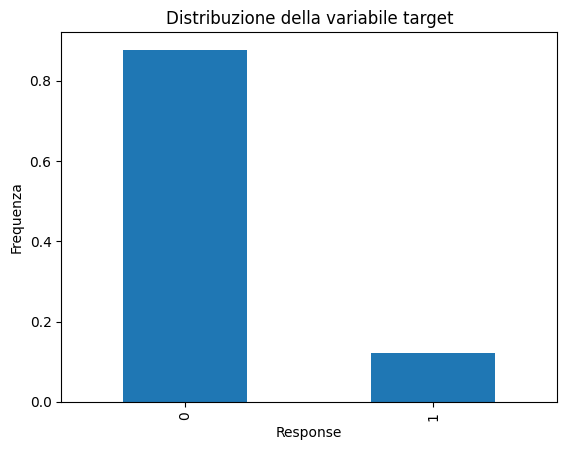

In [11]:
# Mostro anche un grafico per avere più chiara la distribuzione della variabile target
df["Response"].value_counts(normalize=True).plot(kind='bar', title='Distribuzione della variabile target')
plt.xlabel('Response')
plt.ylabel('Frequenza')
plt.show()

In [13]:
response_distribution = df['Response'].value_counts()
print("\nDistribuzione della variabile target (Response):")
print(response_distribution)


Distribuzione della variabile target (Response):
Response
0    334399
1     46710
Name: count, dtype: int64


In [14]:
# Visualizzazione delle percentuali
print(f"Proposte di cross-sell accettate = {response_distribution[0]} ({response_distribution[0]/response_distribution.sum()*100:.2f}%) ")
print(f"Proposte di cross-sell NON accettate = {response_distribution[1]} ({response_distribution[1]/response_distribution.sum()*100:.2f}%) ")

Proposte di cross-sell accettate = 334399 (87.74%) 
Proposte di cross-sell NON accettate = 46710 (12.26%) 


In [15]:
# Descrizione statistica delle variabili numeriche
df.describe()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,0.540761,38.822584,0.997869,26.388807,0.458210,0.609616,0.504877,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,0.498336,15.511611,0.046110,13.229888,0.498251,0.567439,0.499977,17213.155057,54.203995,83.671304,0.327936
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,0.000000,25.000000,1.000000,15.000000,0.000000,0.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,1.000000,36.000000,1.000000,28.000000,0.000000,1.000000,1.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,1.000000,49.000000,1.000000,35.000000,1.000000,1.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,1.000000,85.000000,1.000000,52.000000,1.000000,2.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


#### OSSERVAZIONI INTERESSANTI:
- **COUNT:** assenza di valori nulli per ogni colonna.
- **Gender:** più della metà dei clienti sono uomini.
- **Driving_License:** quasi tutti i clienti hanno una patente di guida (mean = 0.9978).
- **Previously_Insured:** più della metà dei clienti non era precedentemente assicurato.
- **Vehicle_Damage:** la metà dei clienti ha un veicolo danneggiato.
- **Response:** solo il 12% ha risposto positivamente alla proposta di cross-sell.
> Questo suggerisce uno sbilanciamento della classe target.
Questo può portare a problemi durante l'addestramento del modello, poiché il modello potrebbe favorire la classe dominante e ignorare la classe minoritaria.

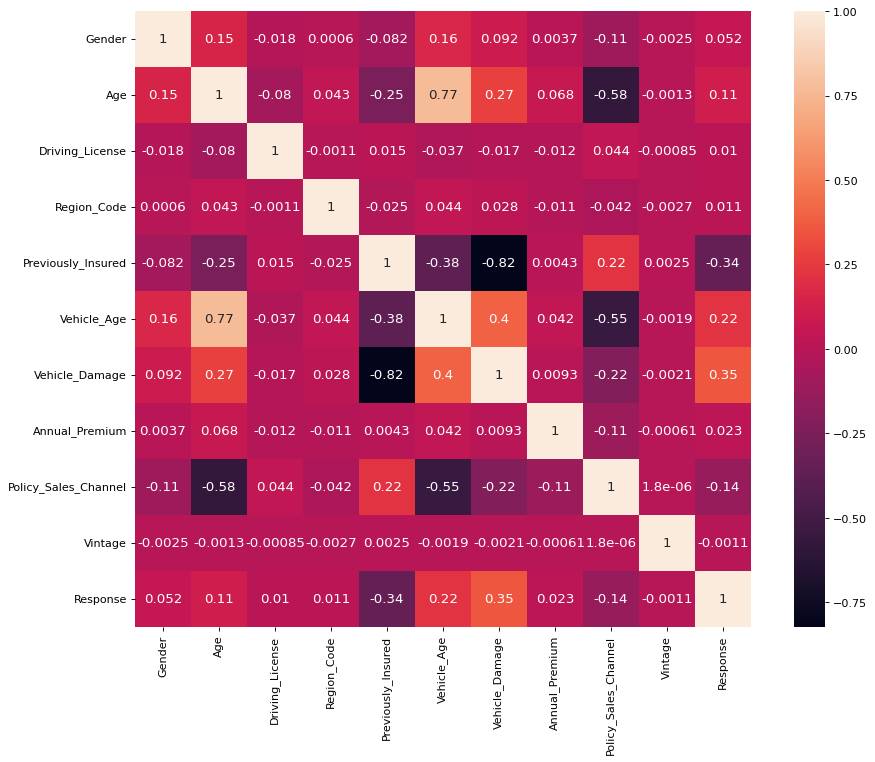

In [16]:
# CORRELAZIONE TRA I DATI
plt.figure(figsize=(14, 10), dpi=80)

df_corr = df.drop("id", axis=1)
hm = sns.heatmap(df_corr.corr(),
                 cbar=True,
                 square=True,
                 yticklabels=df_corr.columns,     # passo i nomi delle colonne
                 xticklabels=df_corr.columns,
                 annot=True,                  #Questo ci mostra i valori degli indici (numeri dentro i quadrati)
                 annot_kws={'size':12})       #Impostiamo la dimensione dell'annotazione del font a 12 per farla entrare dentro il quadrato

plt.show()

**CORRELAZIONI:**
- Forte correlazione negativa tra *Previously_Insured - Vehicle_Damage (-0.82)*: i clienti già assicurati hanno una probabilità molto bassa di aver subito danni al veicolo.
- *Vehicle_Age - Age (0.77)*: forte correlazione positiva tra l'età del veicolo e l'età del cliente. Questo risultato potrebbe indicare che i clienti più anziani potrebbero avere veicoli più vecchi, mentre i clienti più giovani potrebbero avere veicoli più nuovi.

Dalla heat map, si può osservare che la variabile Response è più correlata con le seguenti variabili (in ordine di importanza):
- *Vehicle_Damage - Response (0.35)*: i clienti che hanno subito danni al veicolo sono più inclini ad accettare un'offerta di assicurazione.
- *Previously_Insured - Response (-0.34)*: i clienti già assicurati hanno una minore probabilità di rispondere positivamente all'offerta avendo già un'assicurazione.
- *Vehicle_Age - Response (0.22)*: i clienti con veicoli più vecchi potrebbero essere più inclini ad accettare l'offerta rispetto a quelli con veicoli più nuovi.

Inoltre notiamo anche le seguenti correlazioni:
- *Age - Responses (0.11)*: i clienti più anziani potrebbero avere una leggera tendenza ad accettare l'offerta rispetto ai più giovani.
- *Annual_Premium - Response (0.025)*: da solo non sembra avere un impatto significativo sulla risposta del cliente.
- *Region_Code - Response (0.011)*: **correlazione molto bassa**.

#### 1. Relazione tra Annual_Premium e Response

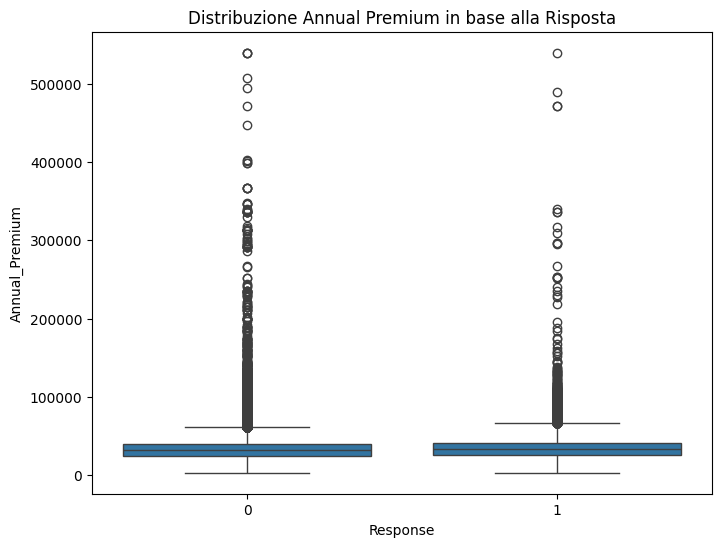

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Response', y='Annual_Premium', data=df)
plt.title('Distribuzione Annual Premium in base alla Risposta')
plt.show()

Come abbiamo visto nella heat map la variabile **Annual_Premium** da sola, non sembra avere un impatto significativo sulla risposta dei clienti.

Per confermare questa osservazione è stato realizzato un boxplot che rappresenta la distribuzione del premio annuale in base alla variabile **Response**.

Dal grafico emerge che la distribuzione di Annual_Premium è simile per entrambi i gruppi (Response = 0 e Response = 1). Questo suggerisce che il premio annuale non rappresenta un fattore discriminante tra i clienti che accettano l'offerta e quelli che la rifiutano.

Inoltre entrambi i gruppi presentano numerosi outlier (premi annuali molto elevati), e la loro distribuzione appare uniforme tra chi accetta e chi rifiuta l'offerta. Ciò indica che i clienti con premi più alti non sono più propensi ad accettare l'offerta rispetto a quelli con premi più bassi.

Infine, la mediana è pressoché identica per entrambi i gruppi, confermando che i clienti che accettano e quelli che rifiutano pagano, in media, premi annuali simili.

#### 2. Relazione tra Previously_Insured e Response

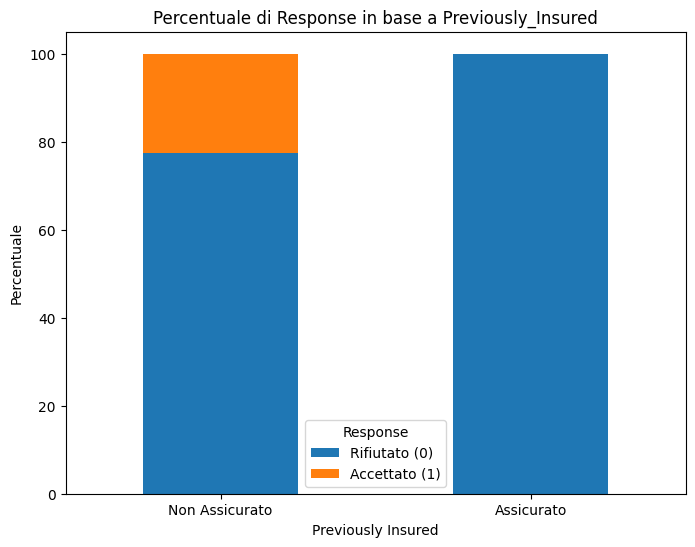

In [18]:
percentage = df.groupby('Previously_Insured')['Response'].value_counts(normalize=True).unstack() * 100
percentage.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Percentuale di Response in base a Previously_Insured')
plt.xlabel('Previously Insured')
plt.ylabel('Percentuale')
plt.xticks(ticks=[0, 1], labels=['Non Assicurato', 'Assicurato'], rotation=0)
plt.legend(title='Response', labels=['Rifiutato (0)', 'Accettato (1)'])
plt.show()

Come vediamo dal grafico tra i clienti non assicurati circa il 20% accetta l'offerta (in arancione), mentre l'80% la rifiuta (in blu).

Al contrario tra i clienti già assicurati la quasi totalità rifiuta l'offerta, con una minima percentuale di accettazione.

Il grafico conferma quanto emerso dalla heatmap: i clienti già assicurati hanno una minore probabilità di accettare l'offerta, poiché dispongono già di una copertura assicurativa. Al contrario, i clienti non assicurati mostrano una maggiore propensione a rispondere positivamente.

#### 3. Relazione tra Vehicle_Age e Response

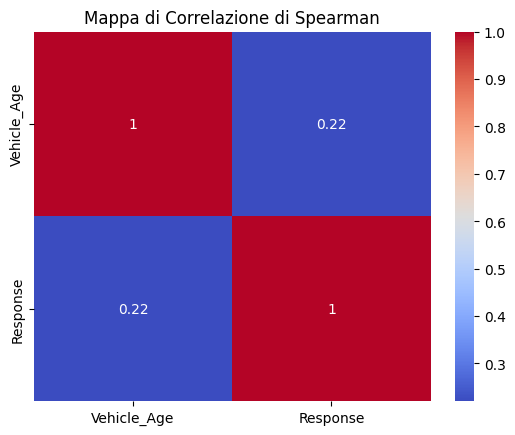

In [19]:
spearman_corr = df[['Vehicle_Age', 'Response']].corr(method='spearman')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title('Mappa di Correlazione di Spearman')
plt.show()

La heat map conferma l'osservazione precedente, evidenziando che Vehicle_Age ha una leggera correlazione con la variabile Response. Questo suggerisce che l'età del veicolo può influenzare in qualche misura la probabilità che un cliente accetti l'offerta, ma il suo impatto è marginale rispetto ad altre variabili.

## GESTIONE DELLO SBILANCIAMENTO DELLE CLASSI
Come visto in precedenza la variabile target "Response" risulta sbilanciata avendo molti più clienti che rifiutano l'offerta rispetto a quelli che la accettano. Per affrontare questo problema, verranno utilizzate tecniche di:

- Class Weights: penalizzazione della classe più frequente nel modello.
- Oversampling o Undersampling: creazione di un dataset più bilanciato per migliorare la capacità del modello di generalizzare.

In [20]:
RANDOM_SEED = 2

In [21]:
from sklearn.model_selection import train_test_split

# Escludo le variabili con correlazione bassa con il target e quelle altamente correlate tra loro.
df_corr = df.drop(columns=["id", "Policy_Sales_Channel", "Region_Code", "Vintage"])

# Creo X e y
X = df_corr.drop("Response", axis=1)
y = df_corr["Response"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=RANDOM_SEED)

In [22]:
print(X_train.shape)
print(y_train.shape)

(266776, 7)
(266776,)


## CREAZIONE DEL MODELLO


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [24]:
#STANDARDIZZAZIONE DELLE FEATURE
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

#DEFINIZIONE DEL MODELLO DA USARE (lr)
lr = LogisticRegression(penalty='l2', class_weight={0:1, 1:5}, random_state=RANDOM_SEED)
lr.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 5}, random_state=2)

## VALUTAZIONE DEL MODELLO

In [25]:
def plot_confusion_matrix(y_test, y_pred_test, precision, recall):
  cm = confusion_matrix(y_test, y_pred_test)
  df_cm = pd.DataFrame(cm,
                       index = ["yes","no"],
                       columns = ["Response yes", "Response no"]
                       )
  plt.figure(figsize=(6, 4))
  sns.heatmap(df_cm, annot=True, fmt='g')
  plt.title(f"Precision: {precision:.3f}     Recall: {recall:.3f}")
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")

In [26]:
def create_confusion_matrix(y_test, y_pred_test):
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)

    # Confusion matrix
    plot_confusion_matrix(y_test, y_pred_test, precision, recall)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, RocCurveDisplay, mean_squared_error, r2_score

def model_evaluation(data_train, data_test, model):
    X_train, y_train = data_train
    X_test, y_test = data_test

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    print("****************************************************")
    print("TRAIN SET")
    print(f"MSE: {mean_squared_error(y_train, y_pred_train):.3f}")
    print(f"R2: {r2_score(y_train, y_pred_train):.3f}")
    print("****************************************************")
    print("TEST SET")
    print(f"MSE: {mean_squared_error(y_test, y_pred_test):.3f}")
    print(f"R2: {r2_score(y_test, y_pred_test):.3f}")
    print("****************************************************")
    print("TRAIN SET")
    print(classification_report(y_train, y_pred_train))
    print("****************************************************")
    print("TEST SET")
    print(classification_report(y_test, y_pred_test))
    print("****************************************************")

    # Plot ROC curve
    RocCurveDisplay.from_estimator(lr, X_test, y_test)
    plt.show()

    return y_pred_test

### VALLUTAZIONE SENZA OTTIMIZZAZIONI

****************************************************
TRAIN SET
MSE: 0.352
R2: -2.258
****************************************************
TEST SET
MSE: 0.353
R2: -2.324
****************************************************
TRAIN SET
              precision    recall  f1-score   support

           0       0.99      0.61      0.75    233876
           1       0.25      0.94      0.40     32900

    accuracy                           0.65    266776
   macro avg       0.62      0.77      0.57    266776
weighted avg       0.90      0.65      0.71    266776

****************************************************
TEST SET
              precision    recall  f1-score   support

           0       0.99      0.61      0.75    100523
           1       0.25      0.94      0.39     13810

    accuracy                           0.65    114333
   macro avg       0.62      0.77      0.57    114333
weighted avg       0.90      0.65      0.71    114333

****************************************************

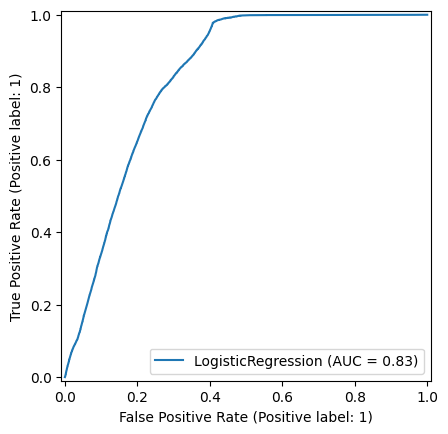

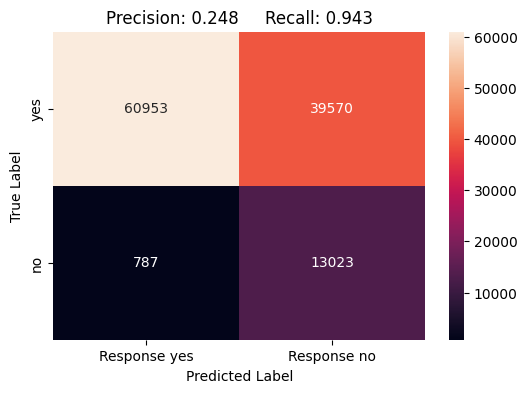

In [28]:
y_pred_test = model_evaluation((X_train, y_train), (X_test, y_test), lr)
create_confusion_matrix(y_test, y_pred_test)

### VALUTAZIONE DEL MODELLO CON RESAMPLE

In [29]:
#1. UNDERSAMPLING/OVERSAMPLING (utilizzo resample)
from sklearn.utils import resample

def resample_model(data):
  X_train, y_train = data

  X_train_minority = X_train[y_train == 1]  # Classe minoritaria
  X_train_majority = X_train[y_train == 0]  # Classe maggioritaria

  print(f"X_train_minority: {X_train_minority.shape}")
  print(f"X_train_majority: {X_train_majority.shape}")

  X_train_oversampled = resample(X_train_minority,
                               replace=True, # campionamento senza ripetizione (non posso scegliere lo stesso campione piùù di una volta)
                               n_samples=len(X_train_majority), # uguale al numero della classe maggioritaria
                               random_state=RANDOM_SEED)

  print(f"X_train_oversampled: {X_train_oversampled.shape}")

  # Unione dei dataset
  X_train_resampled = np.vstack((X_train_majority, X_train_oversampled))
  # vstack(): funzione di numpy che impila gli array verticalmente (cl. maggioritaria + cl. minoritaria resample).
  y_train_resampled = np.hstack((y_train[y_train == 0], np.ones(len(X_train_oversampled))))
  # hstack(): è una funzione di numpy che unisce due array orizzontalmente.
  # ones(): crea un array di 1 di lunghezza uguale al numero di campioni creati per la classe minoritaria. Ogni 1 rappresenta un campione della classe minoritaria.

  print(f"X_train_resampled: {X_train_resampled.shape}")
  print(f"y_train_resampled: {y_train_resampled.shape}")

  return X_train_resampled, y_train_resampled

VALUTAZIONE DEL MODELLO CON OVERSAMPLE:
X_train_minority: (32900, 7)
X_train_majority: (233876, 7)
X_train_oversampled: (233876, 7)
X_train_resampled: (467752, 7)
y_train_resampled: (467752,)
****************************************************
TRAIN SET
MSE: 0.225
R2: 0.100
****************************************************
TEST SET
MSE: 0.353
R2: -2.324
****************************************************
TRAIN SET
              precision    recall  f1-score   support

         0.0       0.91      0.61      0.73    233876
         1.0       0.71      0.94      0.81    233876

    accuracy                           0.77    467752
   macro avg       0.81      0.77      0.77    467752
weighted avg       0.81      0.77      0.77    467752

****************************************************
TEST SET
              precision    recall  f1-score   support

           0       0.99      0.61      0.75    100523
           1       0.25      0.94      0.39     13810

    accuracy            

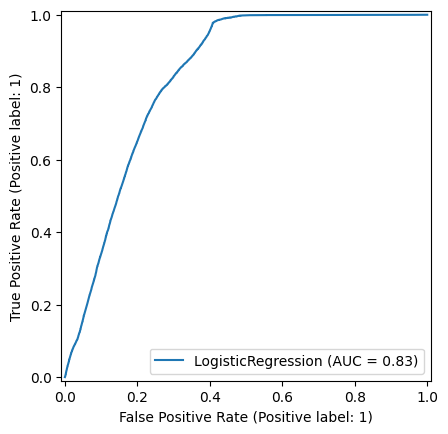

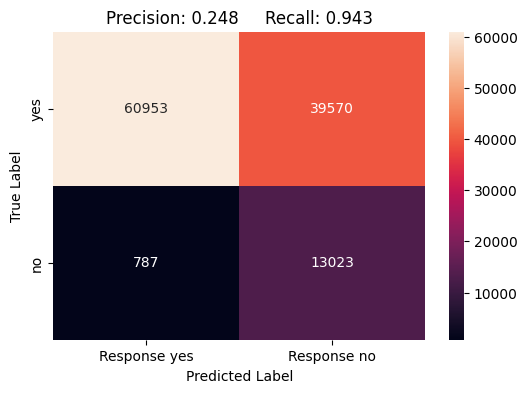

In [30]:
print("VALUTAZIONE DEL MODELLO CON OVERSAMPLE:")
X_train_resampled, y_train_resampled = resample_model((X_train, y_train))
y_pred_test = model_evaluation((X_train_resampled, y_train_resampled), (X_test, y_test), lr)
create_confusion_matrix(y_test, y_pred_test)

### VALUTAZIONE DEL MODELLO CON SMOTE OVERSAMPLING

In [31]:
from imblearn.over_sampling import SMOTE

def resample_model_smote(data):
  X_train, y_train = data

  # SMOTE per il bilanciamento dei dati
  smote = SMOTE(sampling_strategy='auto', random_state=42)
  X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

  return X_train_resampled, y_train_resampled

VALUTAZIONE DEL MODELLO CON SMOTE OVERSAMPLING:
X_train_minority: (32900, 7)
X_train_majority: (233876, 7)
X_train_oversampled: (233876, 7)
X_train_resampled: (467752, 7)
y_train_resampled: (467752,)
****************************************************
TRAIN SET
MSE: 0.225
R2: 0.100
****************************************************
TEST SET
MSE: 0.353
R2: -2.324
****************************************************
TRAIN SET
              precision    recall  f1-score   support

         0.0       0.91      0.61      0.73    233876
         1.0       0.71      0.94      0.81    233876

    accuracy                           0.77    467752
   macro avg       0.81      0.77      0.77    467752
weighted avg       0.81      0.77      0.77    467752

****************************************************
TEST SET
              precision    recall  f1-score   support

           0       0.99      0.61      0.75    100523
           1       0.25      0.94      0.39     13810

    accuracy    

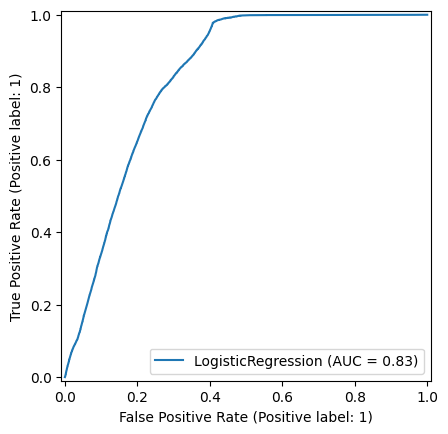

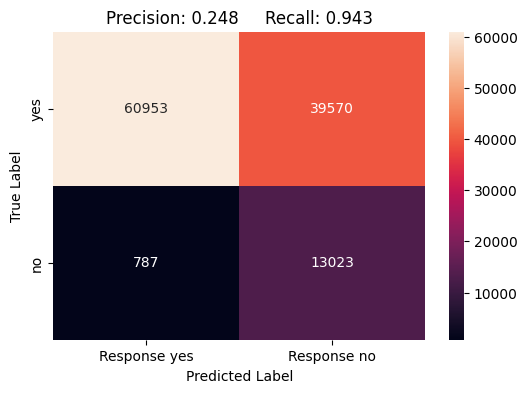

In [32]:
print("VALUTAZIONE DEL MODELLO CON SMOTE OVERSAMPLING:")
X_train_resampled_smote, y_train_resampled_smote = resample_model((X_train, y_train))
y_pred_test = model_evaluation((X_train_resampled_smote, y_train_resampled_smote), (X_test, y_test), lr)
create_confusion_matrix(y_test, y_pred_test)

### VALUTAZIONE DEL MODELLO CON SMOTE UNDESAMPLING

In [33]:
from imblearn.under_sampling import RandomUnderSampler

def resample_model_rus(data):
  X_train, y_train = data

  # Primo, fai Undersampling sulla classe maggioritaria
  undersample = RandomUnderSampler(sampling_strategy='auto', random_state=42)
  X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)

  # Poi applica SMOTE alla classe minoritaria
  X_train_resampled, y_train_resampled = resample_model_smote((X_train_under, y_train_under))

  return X_train_resampled, y_train_resampled

VALUTAZIONE DEL MODELLO CON SMOTE UNDERSAMPLING:
****************************************************
TRAIN SET
MSE: 0.226
R2: 0.097
****************************************************
TEST SET
MSE: 0.353
R2: -2.324
****************************************************
TRAIN SET
              precision    recall  f1-score   support

           0       0.91      0.61      0.73     32900
           1       0.70      0.94      0.81     32900

    accuracy                           0.77     65800
   macro avg       0.81      0.77      0.77     65800
weighted avg       0.81      0.77      0.77     65800

****************************************************
TEST SET
              precision    recall  f1-score   support

           0       0.99      0.61      0.75    100523
           1       0.25      0.94      0.39     13810

    accuracy                           0.65    114333
   macro avg       0.62      0.77      0.57    114333
weighted avg       0.90      0.65      0.71    114333

****

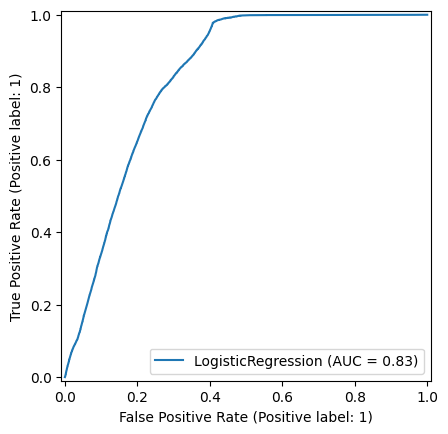

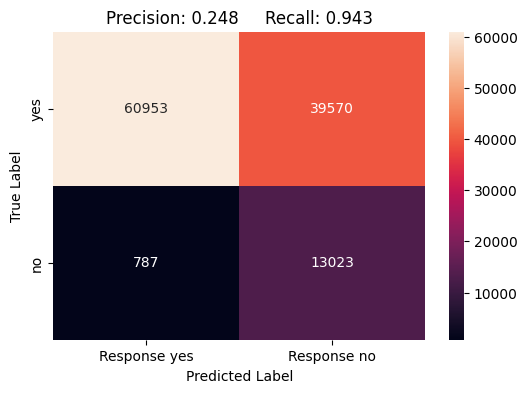

In [34]:
print("VALUTAZIONE DEL MODELLO CON SMOTE UNDERSAMPLING:")
X_train_resampled_smote, y_train_resampled_smote = resample_model_rus((X_train, y_train))
y_pred_test = model_evaluation((X_train_resampled_smote, y_train_resampled_smote), (X_test, y_test), lr)
create_confusion_matrix(y_test, y_pred_test)

#### ANALISI DEI RISULTATI OTTENUTI:
Inizialmente, il modello è stato valutato senza alcuna tecnica di bilanciamento dei dati.

I risultati evidenziano una differenza elevata tra precision e recall, con una recall elevata per la classe positiva (1) ma una precisione molto bassa.
Questo indica quindi che il modello tende a predire molti falsi positivi, ossia clienti che accetterebbero l'offerta quando in realtà non lo fanno.

La metrica R2 negativa sia per il train che per il test set evidenzia una performance scarsa.

Per migliorare il modello, sono state applicate diverse tecniche di bilanciamento dei dati, tutte precedute da una standardizzazione delle variabili.

Per tutte le tecniche utilizzate si nota un miglioramento significativo nel train set, con un aumento della precision e della recall per la classe positiva (1).
Tuttavia, sul test set le metriche rimangono invariate rispetto al modello non ottimizzato.

Inoltre, il valore dell'AUC (0.83) è buono ma rimane invariato rispetto al modello non bilanciato. Questo significa che il modello è in grado di separare bene le classi quando lo si valuta su tutti i possibili threshold.

Per migliorare ulterioremente il modello regolo il threshold di decisione sul test set.

## Predico la probabilità che un cliente risponda positivamente all'offerta di cross-sell.


In [53]:
y_proba_test = lr.predict_proba(X_test)

y_pred_test = np.where(y_proba_test[:,1] > .4, 1, 0)

              precision    recall  f1-score   support

           0       0.99      0.59      0.74    100523
           1       0.25      0.98      0.40     13810

    accuracy                           0.64    114333
   macro avg       0.62      0.78      0.57    114333
weighted avg       0.90      0.64      0.70    114333



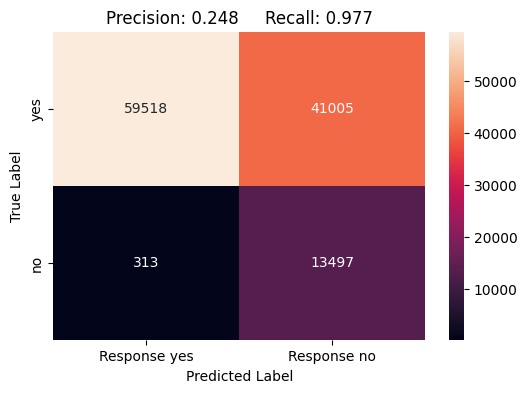

In [54]:
create_confusion_matrix(y_test, y_pred_test)
print(classification_report(y_test, y_pred_test))

#### ANALISI DEI RISULTATI:
Il threshold = 0.4 sembra il migliore, in quanto massimizza la recall (0.98), identificando quasi tutti i clienti interessati.

## CONCLUSIONE
Sulla base dei risultati ottenuti, il modello fornisce una base utile per supportare le decisioni strategiche di cross-selling, grazie a un AUC di 0.83 che indica una buona capacità di distinguere tra clienti potenzialmente interessati e non.
Tuttavia, la performance complessiva rimane limitata, soprattutto a causa del basso valore di precision, che persiste nonostante le varie tecniche di ottimizzazione utilizzate. Questo si traduce in un alto numero di falsi positivi, il che implica costi aggiuntivi per contattare clienti non realmente interessati.